In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [2]:
bio = pd.read_csv('../Data/clean_biodiversity.csv')

In [3]:
bio.head() #already sum the groupby

,Country,System,1990,1991,1992,1993,1994,1995,1996,1997,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Albania,Freshwater,NaN,NaN,NaN,NaN,NaN,4.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,Terrestrial,1507.0,NaN,NaN,NaN,NaN,4.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,Freshwater,13.0,NaN,210.0,86.00,17.0,1053.00,2.00,3.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Algeria,Terrestrial,NaN,NaN,210.0,86.00,17.0,1053.00,2.00,3.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,Terrestrial,NaN,NaN,NaN,114.54,215.8,252.19,288.59,290.64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
bio2 = pd.read_csv('../Data/clean_biodiversity_nogroupby.csv')
bio2.head()

,Unnamed: 0,ID,Species,Common_name,Country,Region,Latitude,Longitude,System,Units,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,0,4,sechellarum,Seychelles magpie robin,Seychelles,Africa,-4.58333,55.93333,Terrestrial,Number of individuals,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,6,ochropectus,Djibouti francolin,Djibouti,Africa,11.76667,42.65806,Terrestrial,Number of individuals,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,7,coprotheres,Cape griffon / Cape vulture,Botswana,Africa,-22.00000,24.00000,Terrestrial,Individuals,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,8,coprotheres,Cape griffon / Cape vulture,Lesotho,Africa,-29.50000,28.25000,Terrestrial,Number of individuals,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,9,coprotheres,Cape griffon / Cape vulture,Mozambique,Africa,-18.25000,35.00000,Terrestrial,Number of individuals,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
bio2.count() #data start to be larger in 1990, should we start from there? and stop in 2006?

Unnamed: 0     3235
ID             3235
Species        3235
Common_name    3235
Country        3235
Region         3235
Latitude       3235
Longitude      3235
System         3235
Units          3235
1950             27
1951             18
1952             19
1953             24
1954             23
1955             25
1956             31
1957             33
1958             35
1959             62
1960             59
1961             89
1962            105
1963             79
1964             87
1965            152
1966            109
1967            133
1968            132
1969            136
               ... 
1986            635
1987            663
1988            640
1989            787
1990            909
1991            885
1992            910
1993            940
1994           1005
1995           1041
1996           1093
1997           1145
1998           1070
1999           1141
2000           1209
2001           1036
2002           1005
2003            940
2004            920


In [6]:
#looking through to see complete dataset

#1967 to 2004 African elephant	South Africa
#cantans	Laysan finch	United States

bio1970_2004 = bio2.loc[:,'1967':'2004'] 
bioheaders = bio2.loc[:,'ID':'Units']
bio3 = bioheaders.join(bio1970_2004)
bio3.head()

#get more data
bio1974_2002 = bio2.loc[:,'1974':'2002']
bioheaders = bio2.loc[:,'ID':'Units']
bio4 = bioheaders.join(bio1974_2002)
bio4.head()

,ID,Species,Common_name,Country,Region,Latitude,Longitude,System,Units,1974,...,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002
0,4,sechellarum,Seychelles magpie robin,Seychelles,Africa,-4.58333,55.93333,Terrestrial,Number of individuals,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,ochropectus,Djibouti francolin,Djibouti,Africa,11.76667,42.65806,Terrestrial,Number of individuals,NaN,...,NaN,NaN,NaN,NaN,NaN,750.0,NaN,NaN,NaN,NaN
2,7,coprotheres,Cape griffon / Cape vulture,Botswana,Africa,-22.00000,24.00000,Terrestrial,Individuals,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,704.0,NaN,NaN
3,8,coprotheres,Cape griffon / Cape vulture,Lesotho,Africa,-29.50000,28.25000,Terrestrial,Number of individuals,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,815.0,NaN,NaN
4,9,coprotheres,Cape griffon / Cape vulture,Mozambique,Africa,-18.25000,35.00000,Terrestrial,Number of individuals,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN


In [7]:
#bio1970_2004 = bio1970_2004.dropna().count()
bio3.dropna(inplace=True)
bio3.head()

bio4.dropna(inplace=True)
bio4.head(20)

,ID,Species,Common_name,Country,Region,Latitude,Longitude,System,Units,1974,...,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002
74,111,africana,African elephant,South Africa,Africa,-23.83333,31.50000,Terrestrial,Individuals,7800.0,...,7600.0,7900.0,8100.0,8300.0,8300.0,9000.0,9300.0,8500.0,9400.0,10500.0
441,1171,acuta,Common pintail / Northern pintail,France,Europe,51.79000,2.76167,Freshwater,Population estimate,52973.0,...,44467.0,47878.0,56862.0,52399.0,56549.0,37513.0,58240.0,52269.0,54707.0,71279.0
442,1172,acuta,Common pintail / Northern pintail,Austria,Europe,48.76972,13.83417,Freshwater,Population estimate,893.0,...,557.0,666.0,699.0,1935.0,890.0,1391.0,1041.0,954.0,1536.0,2104.0
445,1176,clypeata,Northern shoveler,Austria,Europe,48.76972,13.83417,Freshwater,Population estimate,563.0,...,959.0,1303.0,1253.0,1933.0,2207.0,1419.0,1704.0,1428.0,1648.0,1204.0
448,1179,crecca,Common teal / Green-winged teal,France,Europe,51.79000,2.76167,Freshwater,Population estimate,165982.0,...,253709.0,281561.0,348371.0,322939.0,250732.0,282381.0,347012.0,346010.0,416927.0,402369.0
449,1180,crecca,Common teal / Green-winged teal,Austria,Europe,48.76972,13.83417,Freshwater,Population estimate,22063.0,...,18155.0,21193.0,20282.0,29859.0,15245.0,37214.0,34804.0,21142.0,28275.0,19409.0
454,1187,penelope,Eurasian wigeon,Austria,Europe,48.76972,13.83417,Freshwater,Population estimate,783.0,...,1925.0,4502.0,3702.0,3670.0,2785.0,4374.0,4413.0,4501.0,5700.0,6270.0
455,1188,penelope,Eurasian wigeon,France,Europe,51.79000,2.76167,Freshwater,Population estimate,551065.0,...,1224774.0,1421683.0,1656692.0,1461205.0,1187283.0,1350289.0,1410905.0,1279673.0,1568491.0,1488345.0
457,1191,platyrhynchos,Mallard / Common mallard,France,Europe,50.06000,6.67000,Freshwater,Population estimate,1068197.0,...,1282520.0,1219065.0,1166972.0,1006951.0,924568.0,995978.0,1171622.0,1109433.0,1236423.0,1224456.0
459,1193,platyrhynchos,Mallard / Common mallard,Austria,Europe,48.76972,13.83417,Freshwater,Population estimate,886546.0,...,519100.0,500011.0,470688.0,502203.0,373760.0,453141.0,552710.0,487965.0,508661.0,523232.0


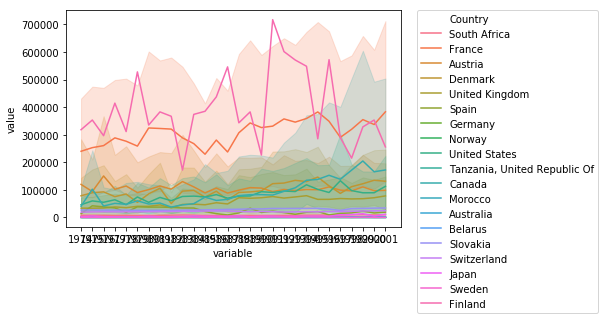

In [8]:
#melt data
c = np.arange(1974,2002,1)
c = c.tolist()
c = map(str,c)
print(c)

bio4melt = pd.melt(bio4, id_vars='Country', value_vars=c)
bio4melt.head(10)

sns.lineplot(x='variable', y='value', data=bio4melt, hue='Country')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#would be easier to compare with a percentage instead

In [10]:
#creating a percentage for biodiversity data

bio4['1975']=bio4['1975']/bio4['1974']*100
bio4['1976']=bio4['1976']/bio4['1974']*100
bio4['1977']=bio4['1977']/bio4['1974']*100
bio4['1978']=bio4['1978']/bio4['1974']*100
bio4['1979']=bio4['1979']/bio4['1974']*100
bio4['1980']=bio4['1980']/bio4['1974']*100
bio4['1981']=bio4['1981']/bio4['1974']*100
bio4['1982']=bio4['1982']/bio4['1974']*100
bio4['1983']=bio4['1983']/bio4['1974']*100
bio4['1984']=bio4['1984']/bio4['1974']*100
bio4['1985']=bio4['1985']/bio4['1974']*100
bio4['1986']=bio4['1986']/bio4['1974']*100
bio4['1987']=bio4['1987']/bio4['1974']*100
bio4['1988']=bio4['1988']/bio4['1974']*100
bio4['1989']=bio4['1989']/bio4['1974']*100
bio4['1990']=bio4['1990']/bio4['1974']*100
bio4['1991']=bio4['1991']/bio4['1974']*100
bio4['1992']=bio4['1992']/bio4['1974']*100
bio4['1993']=bio4['1993']/bio4['1974']*100
bio4['1994']=bio4['1994']/bio4['1974']*100
bio4['1995']=bio4['1995']/bio4['1974']*100
bio4['1996']=bio4['1996']/bio4['1974']*100
bio4['1997']=bio4['1997']/bio4['1974']*100
bio4['1998']=bio4['1998']/bio4['1974']*100
bio4['1999']=bio4['1999']/bio4['1974']*100
bio4['2000']=bio4['2000']/bio4['1974']*100
bio4['2001']=bio4['2001']/bio4['1974']*100
bio4['2002']=bio4['2002']/bio4['1974']*100

bio4.head()

,ID,Species,Common_name,Country,Region,Latitude,Longitude,System,Units,1974,...,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002
74,111,africana,African elephant,South Africa,Africa,-23.83333,31.50000,Terrestrial,Individuals,7800.0,...,97.435897,101.282051,103.846154,106.410256,106.410256,115.384615,119.230769,108.974359,120.512821,134.615385
441,1171,acuta,Common pintail / Northern pintail,France,Europe,51.79000,2.76167,Freshwater,Population estimate,52973.0,...,83.942763,90.381893,107.341476,98.916429,106.750609,70.815321,109.942801,98.671021,103.273366,134.557227
442,1172,acuta,Common pintail / Northern pintail,Austria,Europe,48.76972,13.83417,Freshwater,Population estimate,893.0,...,62.374020,74.580067,78.275476,216.685330,99.664054,155.767077,116.573348,106.830907,172.004479,235.610302
445,1176,clypeata,Northern shoveler,Austria,Europe,48.76972,13.83417,Freshwater,Population estimate,563.0,...,170.337478,231.438721,222.557726,343.339254,392.007105,252.042629,302.664298,253.641208,292.717584,213.854352
448,1179,crecca,Common teal / Green-winged teal,France,Europe,51.79000,2.76167,Freshwater,Population estimate,165982.0,...,152.853321,169.633454,209.884807,194.562663,151.059753,170.127484,209.066043,208.462363,251.188081,242.417250


In [11]:
#do not re-run
bio4['1974']=bio4['1974']/bio4['1974']*100
bio4.head(20)

,ID,Species,Common_name,Country,Region,Latitude,Longitude,System,Units,1974,...,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002
74,111,africana,African elephant,South Africa,Africa,-23.83333,31.50000,Terrestrial,Individuals,100.0,...,97.435897,101.282051,103.846154,106.410256,106.410256,115.384615,119.230769,108.974359,120.512821,134.615385
441,1171,acuta,Common pintail / Northern pintail,France,Europe,51.79000,2.76167,Freshwater,Population estimate,100.0,...,83.942763,90.381893,107.341476,98.916429,106.750609,70.815321,109.942801,98.671021,103.273366,134.557227
442,1172,acuta,Common pintail / Northern pintail,Austria,Europe,48.76972,13.83417,Freshwater,Population estimate,100.0,...,62.374020,74.580067,78.275476,216.685330,99.664054,155.767077,116.573348,106.830907,172.004479,235.610302
445,1176,clypeata,Northern shoveler,Austria,Europe,48.76972,13.83417,Freshwater,Population estimate,100.0,...,170.337478,231.438721,222.557726,343.339254,392.007105,252.042629,302.664298,253.641208,292.717584,213.854352
448,1179,crecca,Common teal / Green-winged teal,France,Europe,51.79000,2.76167,Freshwater,Population estimate,100.0,...,152.853321,169.633454,209.884807,194.562663,151.059753,170.127484,209.066043,208.462363,251.188081,242.417250
449,1180,crecca,Common teal / Green-winged teal,Austria,Europe,48.76972,13.83417,Freshwater,Population estimate,100.0,...,82.287087,96.056747,91.927662,135.335177,69.097584,168.671532,157.748266,95.825590,128.155736,87.970811
454,1187,penelope,Eurasian wigeon,Austria,Europe,48.76972,13.83417,Freshwater,Population estimate,100.0,...,245.849298,574.968072,472.796935,468.710089,355.683269,558.620690,563.601533,574.840358,727.969349,800.766284
455,1188,penelope,Eurasian wigeon,France,Europe,51.79000,2.76167,Freshwater,Population estimate,100.0,...,222.255814,257.988259,300.634589,265.160190,215.452442,245.032619,256.032410,232.218159,284.629037,270.085199
457,1191,platyrhynchos,Mallard / Common mallard,France,Europe,50.06000,6.67000,Freshwater,Population estimate,100.0,...,120.063996,114.123612,109.246890,94.266413,86.554072,93.239168,109.682203,103.860337,115.748593,114.628294
459,1193,platyrhynchos,Mallard / Common mallard,Austria,Europe,48.76972,13.83417,Freshwater,Population estimate,100.0,...,58.553081,56.399894,53.092338,56.647145,42.159121,51.113084,62.344199,55.041137,57.375590,59.019160


In [12]:
bio4['Country'].value_counts()

#type of animals
bio4[bio4['Country'] == 'France'] # 11 freshwater
bio4[bio4['Country'] == 'Canada'] #1 terrestrial 4 freshwater
bio4[bio4['Country'] == 'United States'] #3 terrestrials 3 freshwater
bio4[bio4['Country'] == 'Austria'] #11 freshwater

,ID,Species,Common_name,Country,Region,Latitude,Longitude,System,Units,1974,...,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002
442,1172,acuta,Common pintail / Northern pintail,Austria,Europe,48.76972,13.83417,Freshwater,Population estimate,100.0,...,62.374020,74.580067,78.275476,216.685330,99.664054,155.767077,116.573348,106.830907,172.004479,235.610302
445,1176,clypeata,Northern shoveler,Austria,Europe,48.76972,13.83417,Freshwater,Population estimate,100.0,...,170.337478,231.438721,222.557726,343.339254,392.007105,252.042629,302.664298,253.641208,292.717584,213.854352
449,1180,crecca,Common teal / Green-winged teal,Austria,Europe,48.76972,13.83417,Freshwater,Population estimate,100.0,...,82.287087,96.056747,91.927662,135.335177,69.097584,168.671532,157.748266,95.825590,128.155736,87.970811
454,1187,penelope,Eurasian wigeon,Austria,Europe,48.76972,13.83417,Freshwater,Population estimate,100.0,...,245.849298,574.968072,472.796935,468.710089,355.683269,558.620690,563.601533,574.840358,727.969349,800.766284
459,1193,platyrhynchos,Mallard / Common mallard,Austria,Europe,48.76972,13.83417,Freshwater,Population estimate,100.0,...,58.553081,56.399894,53.092338,56.647145,42.159121,51.113084,62.344199,55.041137,57.375590,59.019160
463,1201,strepera,Gadwall,Austria,Europe,48.76972,13.83417,Freshwater,Population estimate,100.0,...,362.132867,443.671329,526.923077,800.594406,672.027972,795.839161,822.447552,562.167832,844.265734,716.013986
481,1235,ferina,Common pochard / European pochard,Austria,Europe,48.76972,13.83417,Freshwater,Population estimate,100.0,...,90.552808,103.136763,120.408081,129.092385,148.281322,103.144814,116.805668,90.799724,107.061910,104.580680
486,1243,fuligula,Tufted duck,Austria,Europe,48.76972,13.83417,Freshwater,Population estimate,100.0,...,166.612864,178.812381,181.549722,202.150079,190.702786,164.160271,180.167601,167.811751,148.537682,162.279713
492,1271,clangula,Common goldeneye,Austria,Europe,48.76972,13.83417,Freshwater,Population estimate,100.0,...,92.121467,117.541242,93.720710,103.732269,132.644741,106.455816,118.806347,116.622885,97.318483,107.823894
497,1283,cygnus,Whooper swan,Austria,Europe,48.76972,13.83417,Freshwater,Population estimate,100.0,...,509.352518,383.453237,411.510791,563.309353,628.776978,454.676259,461.870504,341.726619,456.115108,698.561151


In [13]:
#Canada good country
Canada, United Kingdom, United States, Slovakia, Norway, Tanzania, South Africa

#added data if reduced time 1974-2002
France,Denmark,Austria

SyntaxError: invalid syntax (<ipython-input-13-2654accf3a7f>, line 2)

Text(0,0.5,'Percent of individuals compared to 1974 (%)')

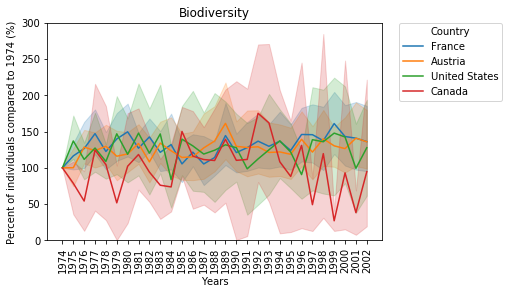

In [32]:
####################################FINAL PLOT!!!!

#melt data
c = np.arange(1974,2003,1)
c = c.tolist()
c = map(str,c)
print(c)

bio5melt = pd.melt(bio4, id_vars='Country', value_vars=c)

bio5spe = bio5melt[(bio5melt.Country == 'Canada') |(bio5melt.Country == 'United States') | (bio5melt.Country == 'France')| (bio5melt.Country == 'Austria')]
bio5spe = bio5spe[bio5spe["value"] < 300]
plt.ylim(0,300)
plt.title("Biodiversity")
sns.lineplot(x='variable', y='value', data=bio5spe, hue='Country')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(np.arange(0,29,1),np.arange(1974,2003,1),rotation=90)
plt.xlabel("Years")
plt.ylabel("Percent of individuals compared to 1974 (%)")

/Users/delphinealbrecht/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0.43381619649201986
2.2947492957643614
-10.034617590143702


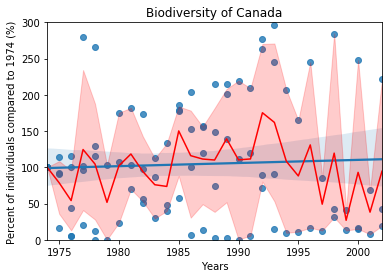

In [68]:
#FINAL PLOT Canada
Canada = bio5melt[(bio5melt.Country == 'Canada')]
Canada = Canada[Canada["value"] < 300]
Canada['variable'] = pd.to_numeric(Canada['variable'])
sns.regplot(x='variable', y='value', data=Canada,order=1, truncate=True) 
sns.lineplot(x='variable', y='value', data=Canada, color='r')
plt.ylim(0,300)
plt.xlim(1974,2002)
plt.title("Biodiversity of Canada")
plt.xlabel("Years")
plt.ylabel("Percent of individuals compared to 1974 (%)")
slope, intercept,r_value, p_value, std_err = linregress(x=Canada['variable'], y=Canada['value'])
fit = slope * Canada['variable'] + intercept

#split in 2
firstCanada = Canada[Canada["variable"] < 1992]
firstslope, firstintercept,firstr_value, firstp_value, firststd_err = linregress(x=firstCanada['variable'], y=firstCanada['value'])
firstfit = slope * firstCanada['variable'] + intercept

secondCanada = Canada[Canada["variable"] >= 1992]
secondslope, secondintercept,secondr_value, secondp_value, secondstd_err = linregress(x=secondCanada['variable'], y=secondCanada['value'])
secondfit = slope * secondCanada['variable'] + intercept

print(slope) #linera model doesn't fit
print(firstslope)
print(secondslope)


0.7328460831420389


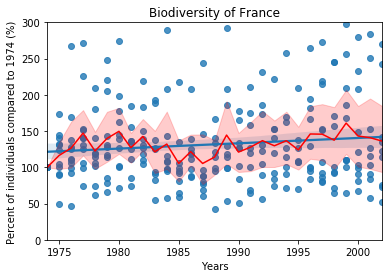

In [21]:
#FINAL PLOT France
France = bio5melt[(bio5melt.Country == 'France')]
France = France[France["value"] < 300]
France['variable'] = pd.to_numeric(France['variable'])
sns.regplot(x='variable', y='value', data=France,order=1, truncate=True) 
sns.lineplot(x='variable', y='value', data=France, color='r')
plt.ylim(0,300)
plt.xlim(1974,2002)
plt.title("Biodiversity of France")
plt.xlabel("Years")
plt.ylabel("Percent of individuals compared to 1974 (%)")

slope, intercept,r_value, p_value, std_err = linregress(x=France['variable'], y=France['value'])
fit = slope * France['variable'] + intercept
r_squared = r_value ** 2

print(slope)


0.21209902712176953


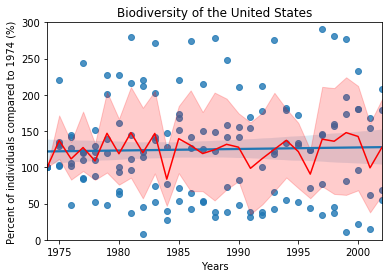

In [22]:
#FINAL PLOT United States
United_States = bio5melt[(bio5melt.Country == 'United States')]
United_States = United_States[United_States["value"] < 300]
United_States['variable'] = pd.to_numeric(United_States['variable'])
sns.regplot(x='variable', y='value', data=United_States,order=1, truncate=True) 
sns.lineplot(x='variable', y='value', data=United_States, color='r')
plt.ylim(0,300)
plt.xlim(1974,2002)
plt.title("Biodiversity of the United States")
plt.xlabel("Years")
plt.ylabel("Percent of individuals compared to 1974 (%)")

slope, intercept,r_value, p_value, std_err = linregress(x=United_States['variable'], y=United_States['value'])
fit = slope * United_States['variable'] + intercept
r_squared = r_value ** 2

print(slope)

0.7335316602737256


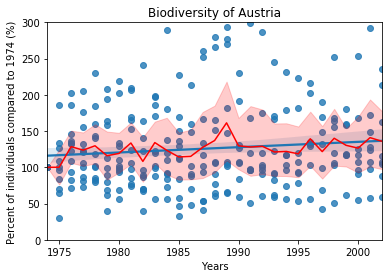

In [23]:
#FINAL PLOT Austria
Austria = bio5melt[(bio5melt.Country == 'Austria')]
Austria = Austria[Austria["value"] < 300]
Austria['variable'] = pd.to_numeric(Austria['variable'])
sns.regplot(x='variable', y='value', data=Austria,order=1, truncate=True) 
sns.lineplot(x='variable', y='value', data=Austria, color='r')
plt.ylim(0,300)
plt.xlim(1974,2002)
plt.title("Biodiversity of Austria")
plt.xlabel("Years")
plt.ylabel("Percent of individuals compared to 1974 (%)")

slope, intercept,r_value, p_value, std_err = linregress(x=Austria['variable'], y=Austria['value'])
fit = slope * Austria['variable'] + intercept
r_squared = r_value ** 2

print(slope)

In [108]:
#correlation with CO2

CO2 = pd.read_csv("../Data/clean_gainofland.csv")
CO2_df = pd.DataFrame(CO2_file)

In [109]:
CO2_df.head()

,index,True,Country,POL,Variable,Year,Unit,Value
0,0,0,Australia,CO2,Total emissions excluding LULUCF,1990,Tonnes of CO2 equivalent,278352.790
1,1,1,Australia,CO2,Total emissions excluding LULUCF,1991,Tonnes of CO2 equivalent,279807.363
2,2,2,Australia,CO2,Total emissions excluding LULUCF,1992,Tonnes of CO2 equivalent,284840.060
3,3,3,Australia,CO2,Total emissions excluding LULUCF,1993,Tonnes of CO2 equivalent,289230.533
4,4,4,Australia,CO2,Total emissions excluding LULUCF,1994,Tonnes of CO2 equivalent,293928.812


0.3933827714609029


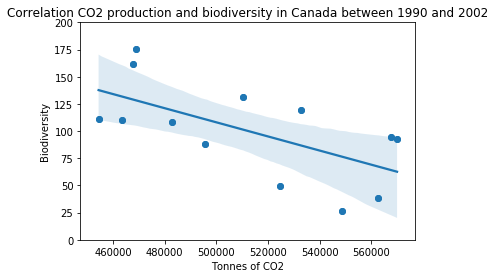

In [116]:
c = np.arange(1990,2002,1)
c = c.tolist()
c = map(str,c)
print(c)

#gain_df.reset_index(inplace=True)

CanadaCO2 = CO2_df[(CO2_df.Country == 'Canada')]

Canada2 = Canada.groupby('variable')['value'].mean()

Canada2 = pd.DataFrame(Canada2)
Canada2.reset_index(inplace=True)
Canada2 = Canada2[(Canada2.variable >= 1990) & (Canada2.variable <= 2002)]

CanadaCO2 = pd.DataFrame(CanadaCO2)
CanadaCO2.reset_index(inplace=True)
CanadaCO2 = CanadaCO2[(CanadaCO2.Year >= 1990) & (CanadaCO2.Year <= 2002)]

plt.scatter(x=CanadaCO2['Value'],y=Canada2['value'])
sns.regplot(x=CanadaCO2['Value'],y=Canada2['value'],order=1, truncate=True) 
plt.xlabel("Tonnes of CO2")
plt.ylabel("Biodiversity")
plt.title("Correlation CO2 production and biodiversity in Canada between 1990 and 2002")
plt.ylim(0,200)

Canadaslope, Canadaintercept,Canadar_value, Canadap_value, std_err = linregress(x=CanadaCO2['Value'],y=Canada2['value'])
fit = slope * CanadaCO2['Value'] + intercept
Canadar_squared = Canadar_value ** 2

print(Canadar_squared)